In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
import matplotlib.pyplot as plt

## 01 lines3d

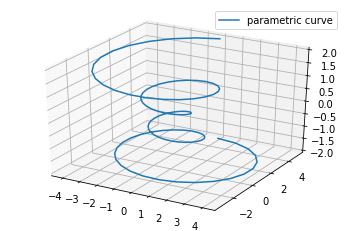

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)

x = r * np.sin(theta)
y = r * np.cos(theta)
r = z**2 + 1

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

## 02 scatter3d

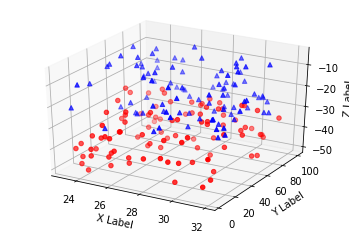

In [3]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

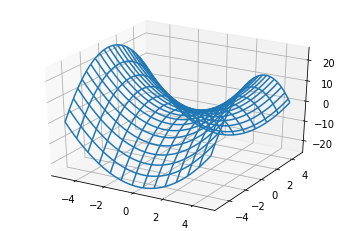

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

#Define Function
Z =X**2 - Y**2 

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=3)

plt.show()

## 3D surface

In [13]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


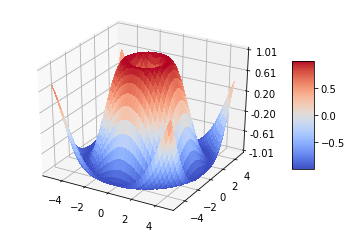

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)


####################### Simple Color ###############
#surf = ax.plot_surface(X, Y, Z, color='r', linewidth=0)
####################################################

################## cmap Color #######################
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#####################################################

##################### Multi Color ###################
# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
xlen = len(X)
ylen = len(Y)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]
# Plot the surface with face colors taken from the array we made.
#surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)
#####################################################

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.w_zaxis.set_major_locator(LinearLocator(6))



plt.show()

### out=np.outer(a,b)
#### Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN]

#### out[i, j] = a[i] * b[j]

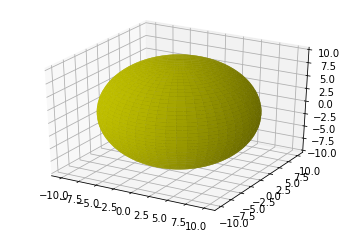

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='y')

plt.show()

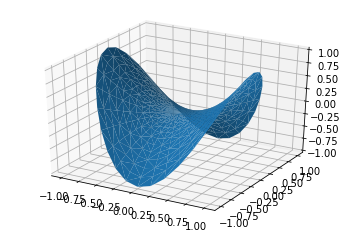

In [5]:
n_radii = 12
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
#z = np.sin(-x*y)
z = x**2-y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()


In [7]:
import matplotlib.tri as mtri

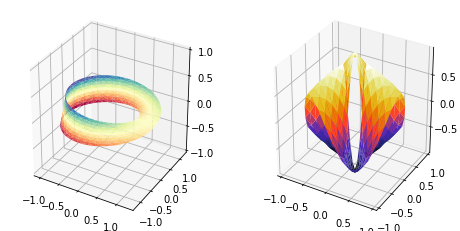

In [34]:
fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()

In [29]:
a = np.array([[1,2,3], [11,22,33]])
a.flatten()
#a.flatten('F')

array([ 1,  2,  3, 11, 22, 33])

# 6 Contour

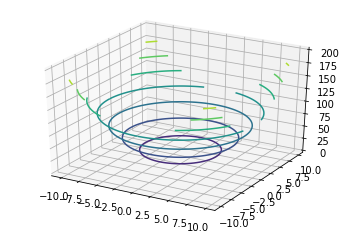

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z=X**2+Y**2

# Make Contour Set
cset = ax.contour(X, Y, Z)

ax.clabel(cset, fontsize=10, extend3d=True, inline=True)

plt.show()


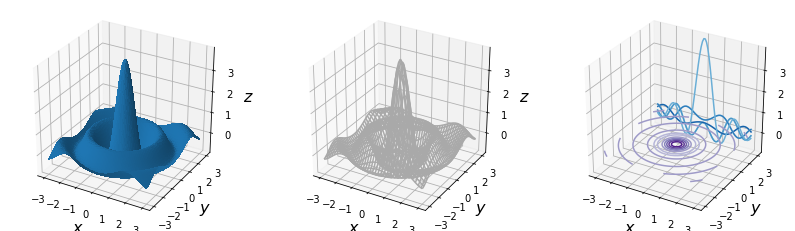

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})
#Setup Axes
def add_labels(ax):
 ax.set_xlabel("$x$", fontsize=16)
 ax.set_ylabel("$y$", fontsize=16)
 ax.set_zlabel("$z$", fontsize=16)
for i in range(3):
    add_labels(axes[i])
    
# Meshgrid    
t = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(t, t)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R


p = axes[0].plot_surface(X, Y, Z , rstride=1, cstride=1, linewidth=0, antialiased=False)
norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
#p = axes[0].plot_surface(X, Y, Z , rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm,  cmap=mpl.cm.Blues)

  

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
#cset = axes[1].contour(X, Y, Z, zdir='y', offset=3, norm=norm,cmap=mpl.cm.Blues)


#cset = axes[2].contour(X, Y, Z, norm=norm, cmap=mpl.cm.Purples)  #default zdir='z'
cset = axes[2].contour(X, Y, Z, offset=0, norm=norm, cmap=mpl.cm.Purples)  #default offset=0

cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
#cset = axes[2].contour(X, Y, Z, zdir='x', offset=3, norm=norm, cmap=mpl.cm.PuRd)


# Parametric 

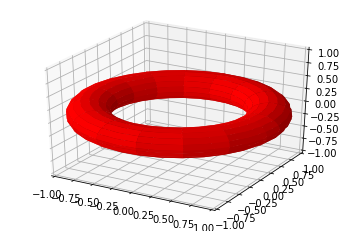

In [72]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.

X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.plot_surface(X, Y, Z, color = 'r', rstride = 2, cstride = 2)
plt.show()